In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("loan-train.csv")
df_test = pd.read_csv("loan-test.csv")

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_train = df_train.drop('Loan_ID', axis=1)

In [6]:
df_train.shape

(614, 12)

In [7]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

In [9]:
df_train.shape

(480, 12)

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [11]:
df_train['Gender']= label_encoder.fit_transform(df_train['Gender'])
df_test['Gender']= label_encoder.fit_transform(df_test['Gender'])
  
df_train['Gender'].unique()

array([1, 0])

In [12]:
df_train['Married']= label_encoder.fit_transform(df_train['Married'])
df_test['Married']= label_encoder.fit_transform(df_test['Married'])
  
df_train['Married'].unique()

array([1, 0])

In [13]:
df_train['Dependents']= label_encoder.fit_transform(df_train['Dependents'])
df_test['Dependents']= label_encoder.fit_transform(df_test['Dependents'])
  
df_train['Dependents'].unique()

array([1, 0, 2, 3])

In [14]:
df_train['Education']= label_encoder.fit_transform(df_train['Education'])
df_test['Education']= label_encoder.fit_transform(df_test['Education'])
  
df_train['Education'].unique()

array([0, 1])

In [15]:
df_train['Self_Employed']= label_encoder.fit_transform(df_train['Self_Employed'])
df_test['Self_Employed']= label_encoder.fit_transform(df_test['Self_Employed'])
  
df_train['Self_Employed'].unique()

array([0, 1])

In [16]:
df_train['Property_Area']= label_encoder.fit_transform(df_train['Property_Area'])
df_test['Property_Area']= label_encoder.fit_transform(df_test['Property_Area'])
  
df_train['Property_Area'].unique()

array([0, 2, 1])

In [17]:
df_train['Loan_Status']= label_encoder.fit_transform(df_train['Loan_Status'])
  
df_train['Loan_Status'].unique()

array([0, 1])

<AxesSubplot:>

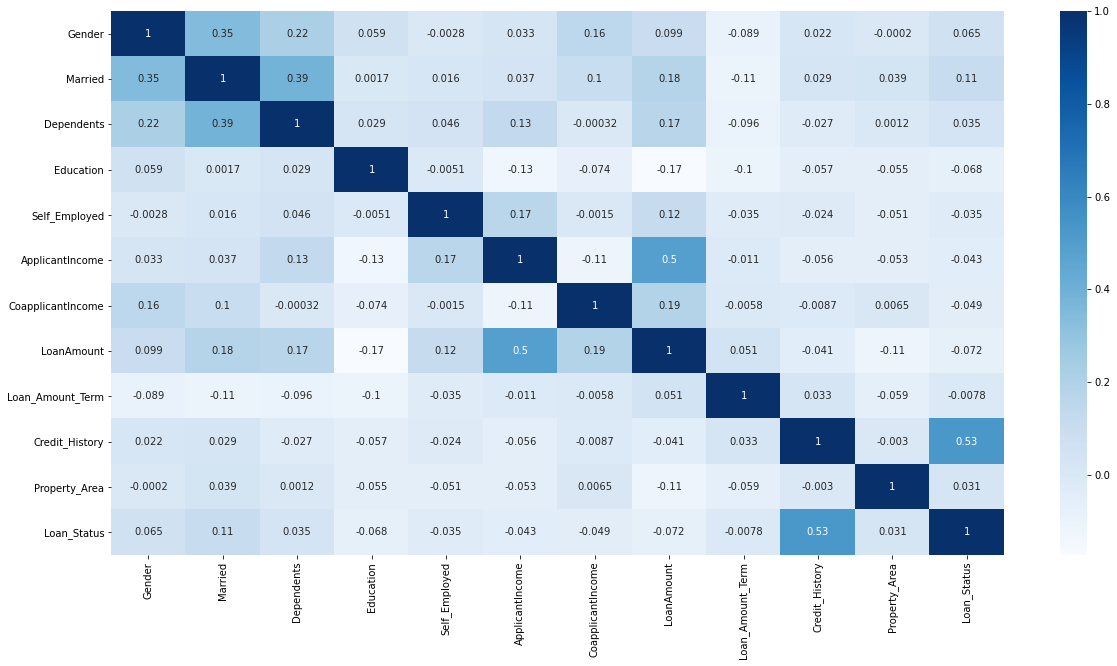

In [18]:
plt.figure(figsize = (20,10))
sns.heatmap(df_train.corr(), annot = True, cmap = 'Blues')

In [19]:
X = df_train.drop(['Loan_Status'], axis =1)
y = df_train['Loan_Status']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 1)

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [23]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [24]:
logreg.score(X_test, y_test)

0.8072916666666666

In [25]:
logreg.score(X_train, y_train)

0.8125